<a href="https://colab.research.google.com/github/performant23/Fraud-Detection-using-Logistic-Regression-Neural-Network-SVM/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The project focuses on fraud detection using a multimodal approach, utilizing logistic regression, support vector machines (SVM), and neural networks. The data preprocessing steps include one-hot encoding for categorical values, feature selection, data sampling, and transformation. Missing, zero, and negative values are checked to ensure data quality. The correlation matrix is analyzed to identify multicollinearity among features.

The best-performing model is determined based on accuracy, precision, recall, F1 score, and AUC. In this case, logistic regression demonstrates superior performance across multiple metrics, showcasing its accuracy in predicting fraudulent transactions. Combining different models, such as logistic regression, SVM, and neural networks, can provide a comprehensive and robust solution. Each model brings unique strengths and perspectives, contributing to an accurate and reliable fraud detection system.

Considering factors beyond performance metrics, such as interpretability, computational efficiency, scalability, and specific application requirements, is crucial when selecting the best model for fraud detection. By leveraging a multimodal approach and understanding the nuances of different models, organizations can enhance their ability to detect and prevent fraudulent activities effectively.

In [1]:
#Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fraud.csv')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


import numpy as np
from google.colab import autoviz
df_2872239293259835800 = autoviz.get_registered_df('df_2872239293259835800')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2872239293259835800, *['amount'], **{})
chart

import numpy as np
from google.colab import autoviz
df_260674310925499669 = autoviz.get_registered_df('df_260674310925499669')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_260674310925499669, *['oldbalanceOrg'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7455902353438880092 = autoviz.get_registered_df('df_7455902353438880092')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7455902353438880092, *['newbalanceOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6315520974428835522 = autoviz.get_registered_df('df_6315520974428835522')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6315520974428835522, *['oldbalanceDest'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4877666640050135524 = autoviz.get_registered_df('df_4877666640050135524')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4877666640050135524, *['amount'], **{})
chart

import numpy as np
from google.colab import autoviz
df_580142516002431477 = autoviz.get_registered_df('df_580142516002431477')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_580142516002431477, *['oldbalanceOrg'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5442090084391117370 = autoviz.get_registered_df('df_5442090084391117370')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5442090084391117370, *['newbalanceOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2193550481665547996 = autoviz.get_registered_df('df_2193550481665547996')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2193550481665547996, *['oldbalanceDest'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6341936407406436876 = autoviz.get_registered_df('df_6341936407406436876')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_6341936407406436876, *['type'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5630904906300239902 = autoviz.get_registered_df('df_5630904906300239902')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_5630904906300239902, *['nameOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1708329236975438113 = autoviz.get_registered_df('df_1708329236975438113')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_1708329236975438113, *['nameDest'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2593856500702904803 = autoviz.get_registered_df('df_2593856500702904803')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_2593856500702904803, *[[['amount', 'oldbalanceOrg'], ['oldbalanceOrg', 'newbalanceOrig'], ['newbalanceOrig', 'oldbalanceDest'], ['oldbalanceDest', 'isFraud']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_7198435254179154901 = autoviz.get_registered_df('df_7198435254179154901')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_7198435254179154901, *['type', 'nameOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7180164957962887101 = autoviz.get_registered_df('df_7180164957962887101')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_7180164957962887101, *['nameOrig', 'nameDest'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2744785749299830424 = autoviz.get_registered_df('df_2744785749299830424')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_2744785749299830424, *['amount', 'type'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_6041581472970637592 = autoviz.get_registered_df('df_6041581472970637592')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_6041581472970637592, *['amount', 'nameOrig'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_8752557480111907636 = autoviz.get_registered_df('df_8752557480111907636')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_8752557480111907636, *['amount', 'nameDest'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_194917035085190312 = autoviz.get_registered_df('df_194917035085190312')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_194917035085190312, *['oldbalanceOrg', 'type'], **{'inner': 'stick'})
chart

**Data Preprocessing**

Steps:
- One-hot encoding for categorical values.
- Feature Selection.
- Sampling Data.
- Transforming Data
- Checking for missing, zero, negative values.
- Checking for multi-collinearity

In [3]:
#One-hot encoding for column 'type'
one_hot_encoded_data = pd.get_dummies(data, columns = ['type'])
one_hot_encoded_data

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,0,1
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,0,1,0,0,0
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,0,0,0,0,1
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,0,1,0,0,0
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0,0,0,0,1


Now, we will drop the columns 'nameDest' and 'nameOrig' because the data in those columns is categorical. If we try to encode the data using techniques like one-hot encoding, the model will become highly complex and wouldn't generalize well for new data.

In [5]:
data = one_hot_encoded_data
data = data.drop(['nameDest', 'nameOrig'], axis = 1)


We will take sample of the data because it can be very computationally complex to train the whole dataset (while it is possible using parallel processing, faster machines, and cloud computing)

In [6]:
subset_data = data.sample(n=100000, random_state=42)
data = subset_data
data

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
3737323,278,330218.42,20866.00,351084.42,452419.57,122201.15,0,0,1,0,0,0,0
264914,15,11647.08,30370.00,18722.92,0.00,0.00,0,0,0,0,0,1,0
85647,10,152264.21,106589.00,258853.21,201303.01,49038.80,0,0,1,0,0,0,0
5899326,403,1551760.63,0.00,0.00,3198359.45,4750120.08,0,0,0,0,0,0,1
2544263,206,78172.30,2921331.58,2999503.88,415821.90,337649.60,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3113342,235,371042.71,1699365.85,2070408.56,4301572.86,3930530.15,0,0,1,0,0,0,0
5156943,357,19494.57,1921089.11,1940583.68,75635.52,56140.95,0,0,1,0,0,0,0
5189870,369,141519.24,0.00,0.00,12853274.23,12994793.47,0,0,0,1,0,0,0
1551677,154,635412.68,58610.00,694022.68,0.00,0.00,0,0,1,0,0,0,0


import numpy as np
from google.colab import autoviz
df_5325313194051711117 = autoviz.get_registered_df('df_5325313194051711117')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5325313194051711117, *['step'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5325313194051711117 = autoviz.get_registered_df('df_5325313194051711117')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5325313194051711117, *['amount'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5325313194051711117 = autoviz.get_registered_df('df_5325313194051711117')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5325313194051711117, *['oldbalanceOrg'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5325313194051711117 = autoviz.get_registered_df('df_5325313194051711117')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5325313194051711117, *['newbalanceOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5325313194051711117 = autoviz.get_registered_df('df_5325313194051711117')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5325313194051711117, *['step'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5325313194051711117 = autoviz.get_registered_df('df_5325313194051711117')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5325313194051711117, *['amount'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5325313194051711117 = autoviz.get_registered_df('df_5325313194051711117')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5325313194051711117, *['oldbalanceOrg'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5325313194051711117 = autoviz.get_registered_df('df_5325313194051711117')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5325313194051711117, *['newbalanceOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5325313194051711117 = autoviz.get_registered_df('df_5325313194051711117')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_5325313194051711117, *[[['step', 'amount'], ['amount', 'oldbalanceOrg'], ['oldbalanceOrg', 'newbalanceOrig'], ['newbalanceOrig', 'oldbalanceDest']]], **{})
chart

In [14]:
#Obtaining 'X' from data
X = data.drop(['isFraud'], axis = 1)
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
3737323,278,330218.42,20866.00,351084.42,452419.57,122201.15,0,1,0,0,0,0
264914,15,11647.08,30370.00,18722.92,0.00,0.00,0,0,0,0,1,0
85647,10,152264.21,106589.00,258853.21,201303.01,49038.80,0,1,0,0,0,0
5899326,403,1551760.63,0.00,0.00,3198359.45,4750120.08,0,0,0,0,0,1
2544263,206,78172.30,2921331.58,2999503.88,415821.90,337649.60,0,1,0,0,0,0


In [13]:
#Obtaining 'Y' from data
Y = data['isFraud']
Y

3737323    0
264914     0
85647      0
5899326    0
2544263    0
          ..
3113342    0
5156943    0
5189870    0
1551677    0
6142173    0
Name: isFraud, Length: 100000, dtype: int64

Next, we should proceed with checking for missing values, negative values, or any other invalid values in our data. While zero values are allowed in our dataset as they are part of the general case scenario, it is still important to identify and handle missing and negative values properly. These values can introduce bias, affect the relationships between features, and potentially cause instability in our model. By addressing these issues, we can ensure the reliability and relevance of our model.

In [15]:
missing_values = X.isnull().sum()
zero_values = (X == 0).sum()
negative_values = (X < 0).sum()
invalid_values = pd.concat([missing_values, zero_values, negative_values], axis=1)
invalid_values.columns = ['Missing Values', 'Zero Values', 'Negative Values']
print(invalid_values)

                Missing Values  Zero Values  Negative Values
step                         0            0                0
amount                       0            0                0
oldbalanceOrg                0        33011                0
newbalanceOrig               0        56810                0
oldbalanceDest               0        42235                0
newbalanceDest               0        38110                0
isFlaggedFraud               0        99999                0
type_CASH_IN                 0        77859                0
type_CASH_OUT                0        64666                0
type_DEBIT                   0        99388                0
type_PAYMENT                 0        66436                0
type_TRANSFER                0        91651                0


In [16]:
# Checking for missing, zero, or negative values in Y
invalid_values_y = pd.DataFrame({'Missing Values': [Y.isnull().sum()],
                                 'Zero Values': [(Y == 0).sum()],
                                 'Negative Values': [(Y < 0).sum()]})
print(invalid_values_y)


   Missing Values  Zero Values  Negative Values
0               0        99859                0


In [17]:
#Standardising the data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


scaler = StandardScaler()

X = scaler.fit_transform(X)

Now that we have checked for invalid values, we need to handle multi-collinearity which indicates strong relationship between predictor variables which can cause problems in models. We can analyse the heatmap of the correlation matrix to check for multi-collinearity.

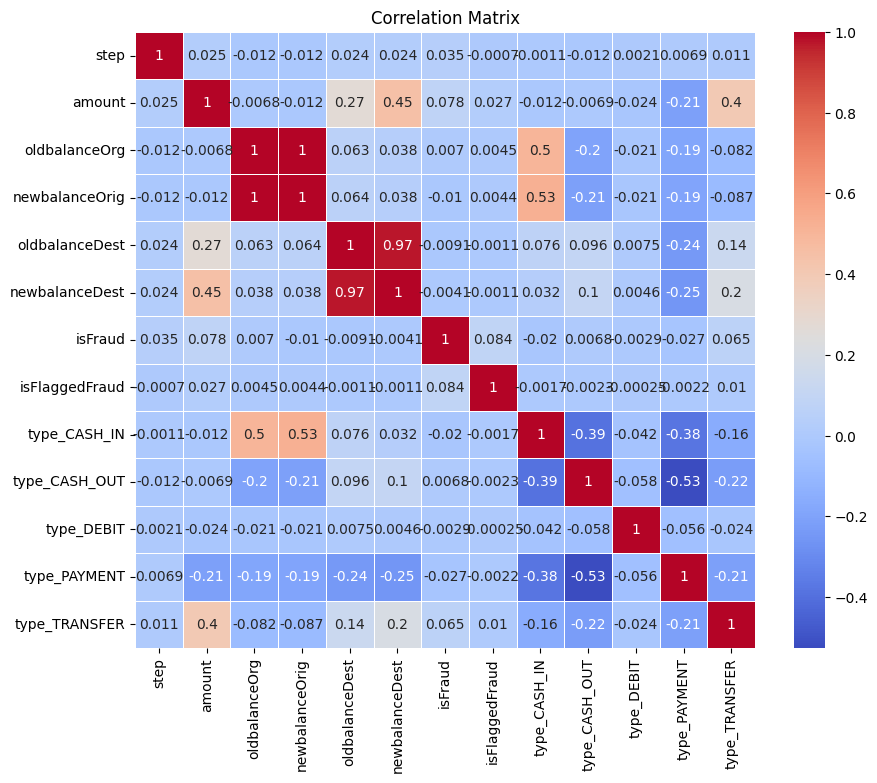

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


As observed, oldbalanceOrg and newbalanceOrig have perfect positive linear relationship meaning they move along the same direction. Almost perfect positive correlation is observed with oldbalanceDest and newbalanceDest as well. In a general scenario, it can be important to remove one of the highly correlated variables but since we are dealing with fraud detection, these factors can provide important information and removing those can cause data loss.

Also, from the correlation matrix, we can infer on which factors contribute most to fraudulent transactions. We can see that factors like step, amount, isFlaggedFraud, and type_TRANSFER have the highest correlations.

These factors make sense in the context of fraudulent transactions.

1. Step: The step variable represents time in the dataset, with each step corresponding to one hour of time. The correlation can mean certain time periods or specific hours have a higher likelihood of fraud occurrence. This information can be useful in identifying patterns and implementing real-time fraud detection strategies based on time-based anomalies.

2. Amount: The amount of the transaction is an important factor in fraud detection. Large transaction amounts may raise suspicions and increase the likelihood of fraudulent activity. In this dataset, the correlation between amount and fraudulent transactions suggests that higher transaction amounts are associated with a higher probability of fraud. Monitoring and analyzing transaction amounts can help in identifying potential fraudulent transactions.

3. isFlaggedFraud: The isFlaggedFraud variable indicates whether a transaction has been flagged as potentially fraudulent by the business model. In this dataset, it is flagged when an attempt is made to transfer more than 200,000 in a single transaction. The high correlation between isFlaggedFraud and fraudulent transactions suggests that this flagging mechanism is effective in identifying potential fraud.

4. Type_TRANSFER: The type_TRANSFER variable indicates if a transaction involves transferring funds from one account to another. The high correlation between type_TRANSFER and fraudulent transactions suggests that this type of transaction is more likely to be associated with fraudulent activity. Monitoring and analyzing transfer transactions can help identify suspicious patterns and potential fraud attempts.

Overall, these factors provide valuable insights into the characteristics of fraudulent transactions.

These correlations can be used to build a more robust system resistant to fraudulent transaction which can be implemented in various ways including:
1. Implementing a robust real-time monitoring system that analyzes transactions, flags suspicious activities, and triggers immediate alerts. This allows for timely intervention and reduces the potential impact of fraudulent transactions.

2. Strengthening transaction validation processes by incorporating advanced algorithms and rules to detect anomalies, validate transaction details, and identify potential fraudulent patterns. This can include analyzing transaction amounts, sender/receiver information, and other relevant factors.

3. Implementing a two-factor authentication process for high-value transactions or sensitive account activities. This adds an extra layer of security by requiring users to provide additional verification, such as a one-time password (OTP).

4. Developing comprehensive fraud analytics capabilities that leverage data mining techniques to detect hidden patterns and identify potential fraud indicators.

Given that these actions are implemented, we can test out the effectiveness by validation methods like:

1. Continuously monitoring the system and analyzing the detection rate of suspicious activities. Keeping track of the number of flagged transactions, the percentage of confirmed fraud cases, and the accuracy of fraud detection. These metrics can be tracked overtime to check if the prevention actions work.

2. Evaluating the false positive rate, which refers to the rate at which legitimate transactions are incorrectly flagged as fraudulent. This is important since alarms and preventive measures for legitimate transactions can become hassle for users.

3. Evaluating if the implemented preventive measures have resulted in a reduction in fraud losses in a substantial manner.

4. Tracking the financial impact of fraud incidents and evaluating if the implemented preventive measures have resulted in a reduction in fraud losses.

Detection of fraudulent activities play an important part in the preventive measures above. So, for our subset of data, we will develop multiple models and test out their efficiency to have a comprehensive view of fraudulent transactions.

We will begin our analysis by exploring logistic regression as one of the models for detecting fraudulent activities in our subset of data. Logistic regression is a popular and widely used classification algorithm that is particularly suitable for binary classification problems like fraud detection. It works by estimating the probabilities of an event occurring, in this case, the likelihood of a transaction being fraudulent. By fitting the logistic regression model to our data, we can obtain insights into the factors and features that contribute to fraudulent transactions. The model can provide us with the coefficients for each feature, indicating their influence on the probability of fraud. This allows us to understand which variables are significant in distinguishing fraudulent transactions and gain valuable insights for fraud detection and prevention strategies. Logistic regression is also interpretable, making it easier to explain the results and make informed decisions based on the model's outputs.

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)


Accuracy: 0.999
Precision: 1.0
Recall: 0.2857142857142857
F1 Score: 0.4444444444444445
AUC: 0.6428571428571428


**The problem with high accuracy**: For models like fraud detection, near-perfect accuracies are common because the classes are imbalanced (e.g. having 1 fraudulent transaction as opposed to 1000s of legitimate transactions). That is why, as a counter-measure, we focus more on metrics such as precision, recall, f1 score, and ROC-AUC score.

As we can see, while the accuracy of the model is quite high, other metrics have low scores. We can infer that the model may have a problem with correctly identifying positive instances (low precision) and may miss some positive instances (low recall). We can improve the model by optimizing it.

First, let's tune the hyperparameters using the GridSearch module.

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

model = LogisticRegression()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

accuracy = best_model.score(X_test, y_test)

print("Best Parameters:", best_params)
print("Accuracy:", accuracy)

from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = best_model.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.99955
Precision: 0.9523809523809523
Recall: 0.7142857142857143
F1 Score: 0.8163265306122449
AUC: 0.8571178220937885


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


As we can see, the overall performance of the model is much better with optimized parameters.

Support Vector Machine (SVM) is a powerful classification algorithm that can also provide valuable insights for fraud detection in our subset of data. SVM operates by finding an optimal hyperplane that separates data points belonging to different classes with the largest margin. This margin represents the confidence of the model in its predictions, as data points located far from the decision boundary are considered to be more confidently classified. By maximizing this margin, SVM can identify the most accurate representation of each class. In the context of fraud detection, SVM can help identify the boundaries between normal and fraudulent transactions based on the patterns and features present in the data. By analyzing the support vectors and the position of data points with respect to the decision boundary, we can gain insights into the critical features that contribute to fraudulent behavior. SVM provides an effective way to handle complex, non-linear relationships in the data and can be a valuable tool in identifying and preventing fraud.

In [28]:
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


clf = svm.SVC(kernel='rbf')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)



Accuracy: 0.999
Precision: 1.0
Recall: 0.2857142857142857
F1 Score: 0.4444444444444445
AUC: 0.6428571428571428


As we can see, we got really high accuracy and precision for the above subset of data (and its split), but got quite low recall and f1 score. We can again, try GridSearch to optimize the parameters

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

model = SVC()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)

from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)


Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.99925
F1 Score: 0.6341463414634146
Precision: 1.0
Recall: 0.4642857142857143
AUC: 0.7321428571428572


Optimizing the parameters certainly help the performance of the model. Now, we can focus on feature selection and see if there are any features that are representing the data substantially.

In [16]:
data.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
step,1.000000,0.025131,-0.011913,-0.012198,0.024287,0.023641,0.034990,-0.000704,-0.001130,-0.012314,0.002140,0.006942,0.010520
amount,0.025131,1.000000,-0.006758,-0.011536,0.272921,0.446489,0.077999,0.027019,-0.012112,-0.006938,-0.024466,-0.213111,0.400864
oldbalanceOrg,-0.011913,-0.006758,1.000000,0.998908,0.062895,0.038052,0.006952,0.004488,0.504831,-0.201630,-0.020782,-0.188538,-0.081599
newbalanceOrig,-0.012198,-0.011536,0.998908,1.000000,0.064450,0.037949,-0.010106,0.004410,0.525268,-0.211577,-0.021198,-0.192995,-0.087360
oldbalanceDest,0.024287,0.272921,0.062895,0.064450,1.000000,0.973435,-0.009096,-0.001083,0.075504,0.095559,0.007500,-0.243512,0.135123
newbalanceDest,0.023641,0.446489,0.038052,0.037949,0.973435,1.000000,-0.004081,-0.001119,0.032081,0.102786,0.004598,-0.251574,0.202391
isFraud,0.034990,0.077999,0.006952,-0.010106,-0.009096,-0.004081,1.000000,0.084156,-0.020038,0.006790,-0.002949,-0.026709,0.064768
isFlaggedFraud,-0.000704,0.027019,0.004488,0.004410,-0.001083,-0.001119,0.084156,1.000000,-0.001686,-0.002338,-0.000248,-0.002248,0.010477
type_CASH_IN,-0.001130,-0.012112,0.504831,0.525268,0.075504,0.032081,-0.020038,-0.001686,1.000000,-0.394187,-0.041846,-0.379035,-0.160951
type_CASH_OUT,-0.012314,-0.006938,-0.201630,-0.211577,0.095559,0.102786,0.006790,-0.002338,-0.394187,1.000000,-0.058005,-0.525404,-0.223104


Now, we will try to explore and solve the problem using neural networks. Neural networks are highly effective for fraud detection due to their ability to learn complex patterns from large datasets. By processing multiple features simultaneously, neural networks can identify subtle patterns and anomalies indicative of fraudulent activities. Their capacity to automatically extract relevant features from raw data reduces the need for manual feature engineering. With their ability to handle high-dimensional and unstructured data, neural networks offer a versatile and powerful approach for detecting fraud across different domains. Leveraging neural networks can significantly enhance organizations' ability to detect and prevent fraudulent activities, ensuring the integrity and security of their systems.

In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense



# Building the neural network model
model = Sequential()
model.add(Dense(32, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# Compiling the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

print("Loss:", loss)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC:", auc_roc)

Epoch 1/10
2500/2500 [==============================] - 12s 4ms/step - loss: 0.0332 - accuracy: 0.9931 - val_loss: 0.0064 - val_accuracy: 0.9988
Epoch 2/10
2500/2500 [==============================] - 7s 3ms/step - loss: 0.0058 - accuracy: 0.9988 - val_loss: 0.0050 - val_accuracy: 0.9990
Epoch 3/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.0048 - accuracy: 0.9990 - val_loss: 0.0048 - val_accuracy: 0.9991
Epoch 4/10
2500/2500 [==============================] - 6s 3ms/step - loss: 0.0044 - accuracy: 0.9991 - val_loss: 0.0050 - val_accuracy: 0.9994
Epoch 5/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.0041 - accuracy: 0.9992 - val_loss: 0.0048 - val_accuracy: 0.9992
Epoch 6/10
2500/2500 [==============================] - 6s 3ms/step - loss: 0.0040 - accuracy: 0.9992 - val_loss: 0.0060 - val_accuracy: 0.9993
Epoch 7/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0044 - val_accuracy

The best performance by each model is:

1. Accuracy: 0.99955 (Logistic Regression), 0.99925 (SVM), and 0.999450 (Neural Network)
2. Precision: 0.95238 (Logistic Regression), 1.0 (SVM), and 0.947368 (Neural Network)
3. Recall: 0.71428 (Logistic Regression), 0.46428 (SVM), and 0.642857 (Neural Network)
4. F1 Score: 0.81632 (Logistic Regression), 0.634146 (SVM), and 0.765957 (Neural Network)
5. AUC: 0.85711 (Logistic Regression), 0.73214 (SVM), and 0.82140 (Neural Network)

The Logistic Regression model demonstrates superior performance compared to the SVM and Neural Network models across multiple evaluation metrics. Logistic Regression achieves high accuracy, precision, recall, F1 score, and AUC, indicating its effectiveness in accurately predicting fraudulent transactions. This model's success can be attributed to its ability to model the relationship between the input features and the binary target variable, making it well-suited for classification tasks like fraud detection.

While Logistic Regression performs well in this case, it is important to consider that different models may excel in different scenarios. Fraud detection is a complex problem that requires a multimodal approach. Combining multiple models, such as Logistic Regression, SVM, and Neural Network, can provide a more comprehensive and robust solution. Each model brings its own strengths and perspectives, contributing to a more accurate and reliable detection system. By leveraging the strengths of various models, we can capture different aspects of fraudulent behavior and enhance the overall detection performance.

It is crucial to consider other factors beyond performance metrics when selecting the best model. These factors include model interpretability, computational efficiency, scalability, and the specific requirements and constraints of the application. For instance, Logistic Regression offers interpretability by providing coefficients that indicate the impact of each feature on the target variable. This interpretability can aid in understanding the underlying patterns of fraud and improving the overall fraud prevention strategy.